#Predicting Overall Rating based on Players Different Stats and Comparing them with their Actual Overall rating


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


##Data PreProcessing

In [2]:
df = pd.read_csv('/content/SS(1).csv')
df

,Unnamed: 0,ID,Position,Player Name,Team Name,Nationality,Height,Weight,Age,Offensive Awareness,...,Tackling,Aggression,Defensive Engagement,GK Awareness,GK Catching,GK Parrying,GK Reflexes,GK Reach,Overall Rating,Price
0,0,7511,SS,L. Messi,Free Agents,Argentina,170,72,35,82,...,45,49,47,40,40,40,40,40,96,740.0
1,1,9242,SS,Raúl García,Bilbao BR,Spain,184,83,36,83,...,56,67,62,40,40,40,40,40,87,32.0
2,2,15323,SS,Y. Kakitani,Tokushima Vortis,Japan,176,68,32,74,...,44,47,53,40,40,40,40,40,80,4.1
3,3,16825,SS,Cristiano,V-Varen Nagasaki,Brazil,183,83,35,75,...,45,48,47,40,40,40,40,40,82,4.9
4,4,40352,SS,Neymar Jr,Paris Saint-Germain,Brazil,175,68,30,79,...,45,52,53,40,40,40,40,40,93,450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,138,105592576286039,SS,L. Messi,Free Agents,Argentina,170,72,35,77,...,45,49,47,40,40,40,40,40,87,0.0
139,139,105592576319242,SS,T. Müller,FC Bayern München,Germany,185,76,33,85,...,54,59,68,40,40,40,40,40,84,0.0
140,140,105592844828490,SS,K. Havertz,Arsenal FC,Germany,188,82,23,87,...,52,56,53,40,40,40,40,40,95,0.0
141,141,106652627934624,SS,Neymar Jr,Paris Saint-Germain,Brazil,175,68,30,80,...,45,52,53,40,40,40,40,40,96,0.0


As we can see few columns are just **Arbitrary Values** which does not have any effect on Player stats.


1.   Unnamed: 0
2.   Player Name
3.   Team Name
4.   Nationality
5.   ID
6.   Position
7.   Price

So Dropping thes columns will not affect data set.





In [3]:

df = df.drop(['Unnamed: 0','Player Name', 'Team Name','Nationality','ID','Position','Price'], axis = 1)


In [4]:
df

,Height,Weight,Age,Offensive Awareness,Ball Control,Dribbling,Tight Possession,Low Pass,Lofted Pass,Finishing,...,Defensive Awareness,Tackling,Aggression,Defensive Engagement,GK Awareness,GK Catching,GK Parrying,GK Reflexes,GK Reach,Overall Rating
0,170,72,35,82,94,93,94,87,81,87,...,42,45,49,47,40,40,40,40,40,96
1,184,83,36,83,85,77,82,75,69,77,...,50,56,67,62,40,40,40,40,40,87
2,176,68,32,74,83,81,81,70,67,72,...,44,44,47,53,40,40,40,40,40,80
3,183,83,35,75,80,82,79,68,71,72,...,43,45,48,47,40,40,40,40,40,82
4,175,68,30,79,92,94,93,83,79,82,...,43,45,52,53,40,40,40,40,40,93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,170,72,35,77,86,85,86,83,77,82,...,42,45,49,47,40,40,40,40,40,87
139,185,76,33,85,79,68,77,79,71,80,...,56,54,59,68,40,40,40,40,40,84
140,188,82,23,87,90,87,88,82,78,82,...,51,52,56,53,40,40,40,40,40,95
141,175,68,30,80,92,94,93,83,80,87,...,43,45,52,53,40,40,40,40,40,96


# EXPLORATORY DATA ANALYSIS

<Axes: >

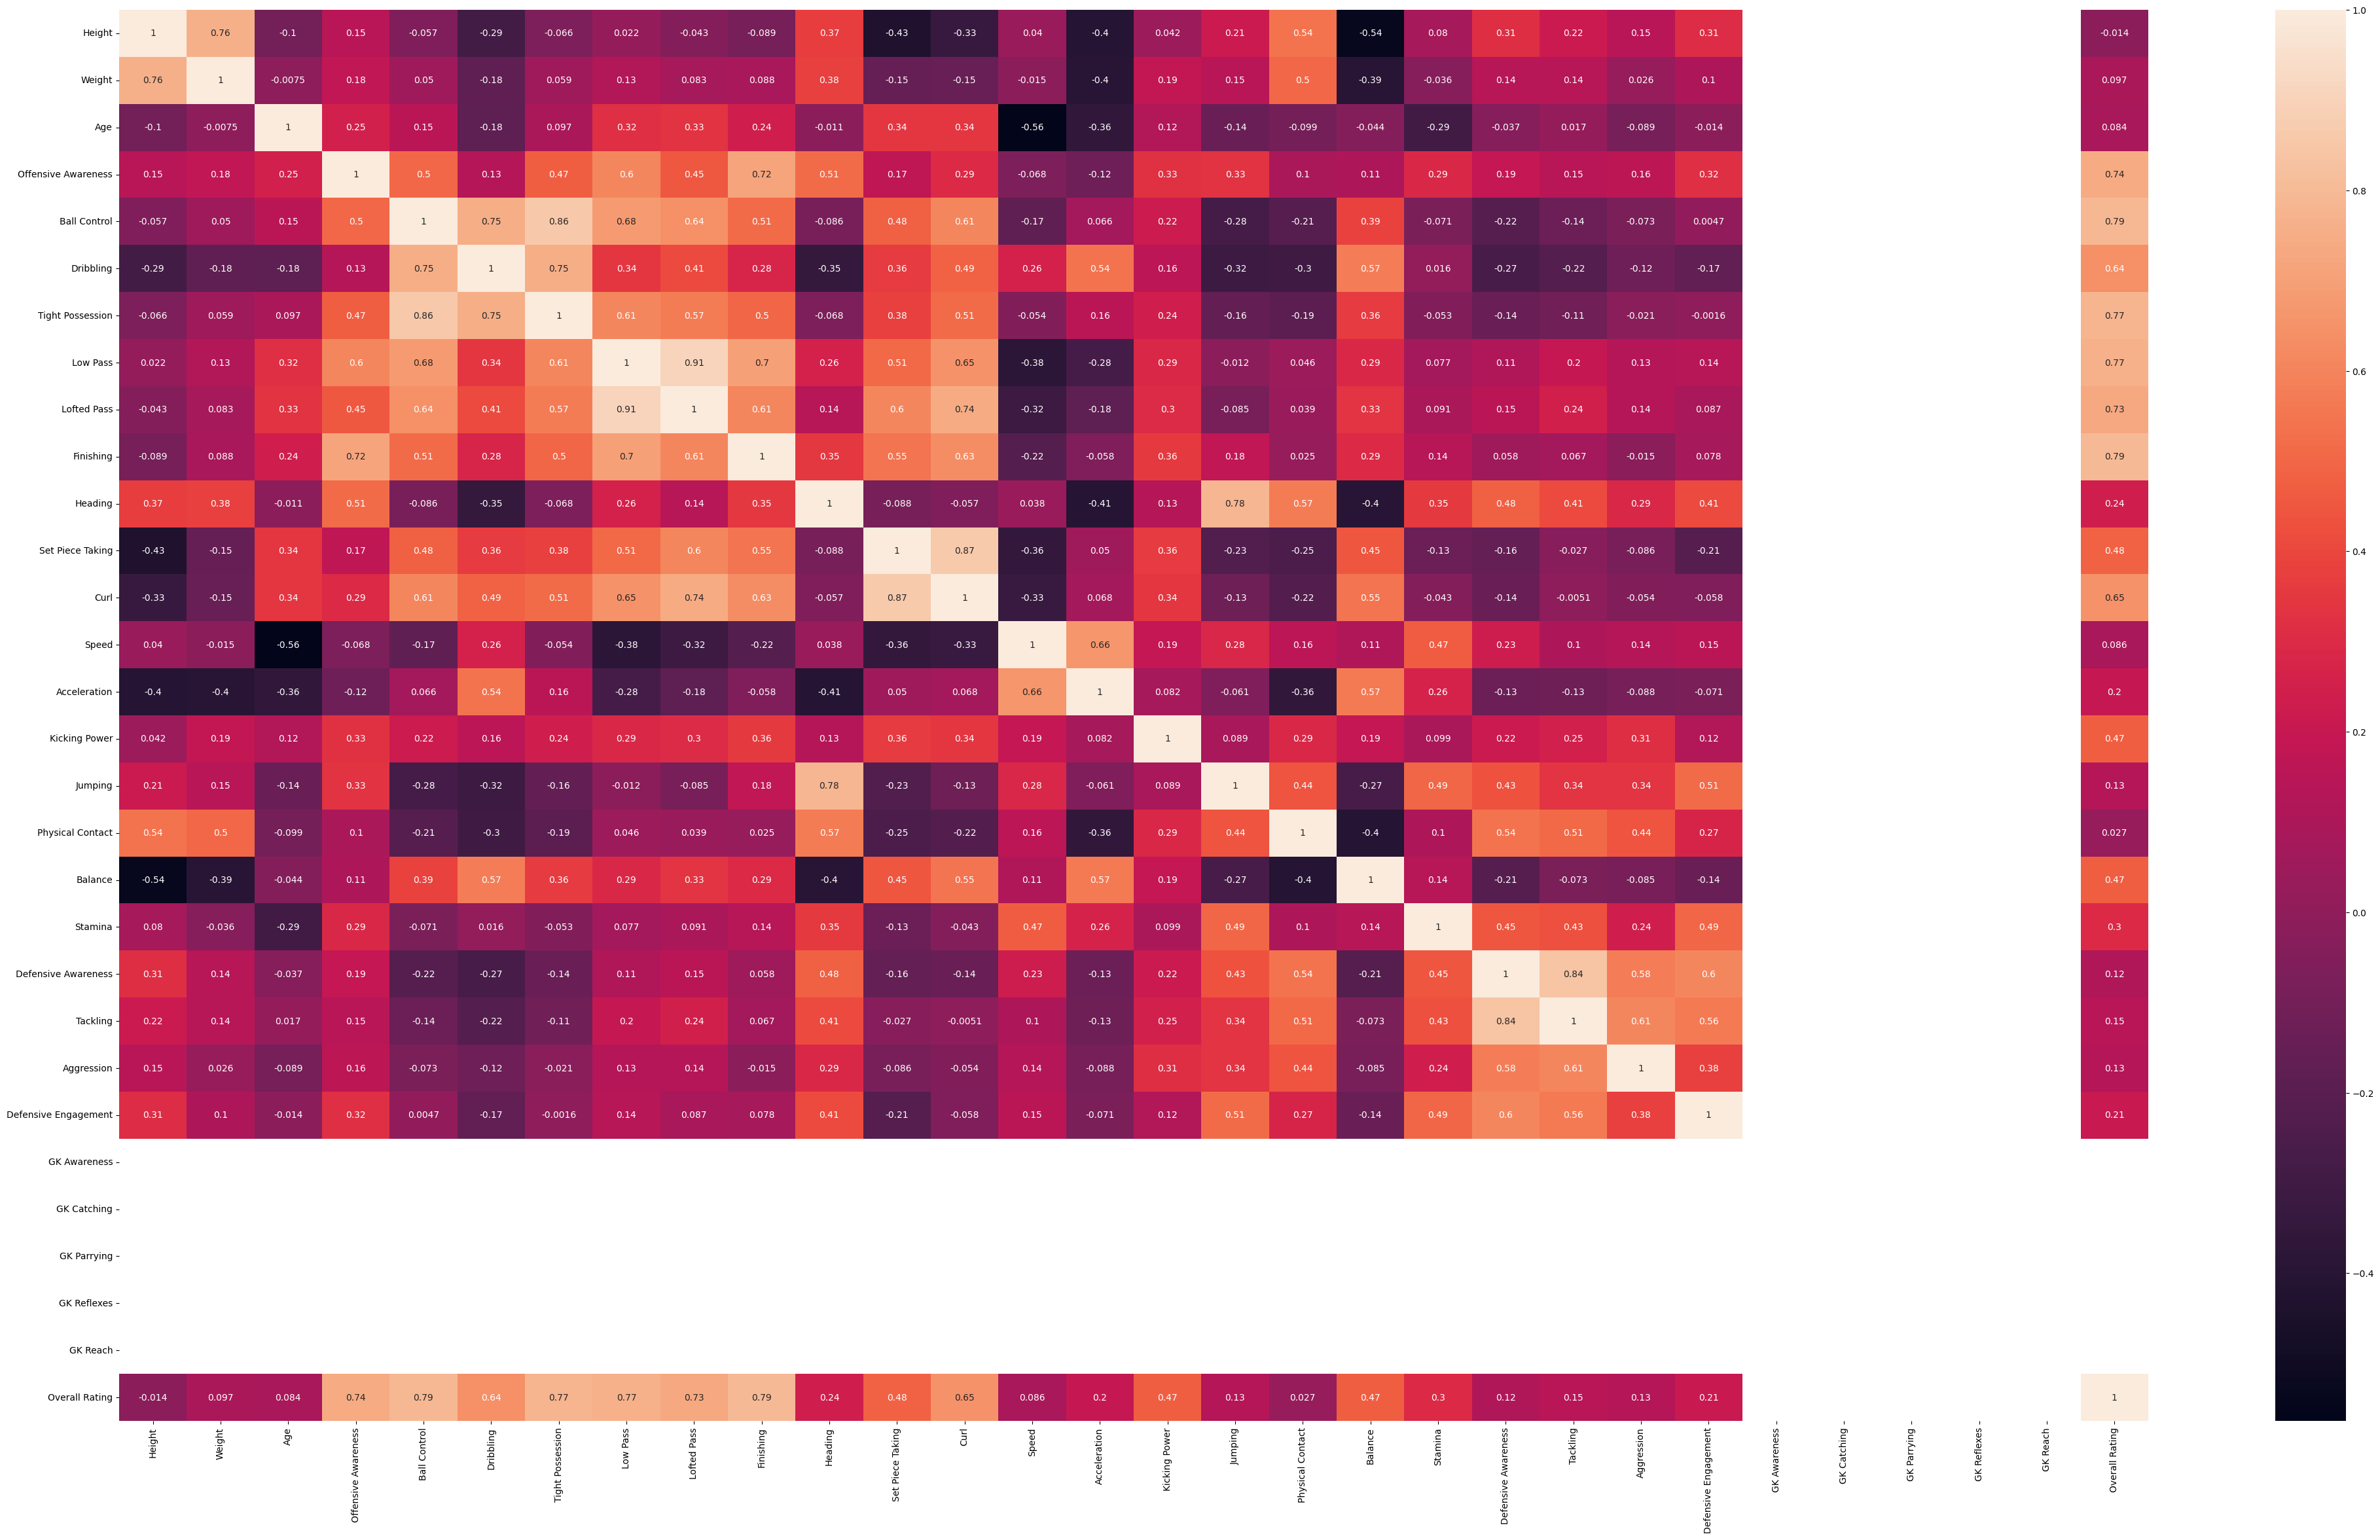

In [5]:
plt.figure(figsize=(50,28))
sns.heatmap(df.corr(), annot = True)

As we can see in the heatmap above overall rating is not correlated significantly with age, weight
and

In [6]:
df = df.drop(['Age','Weight'],axis = 1)

<Axes: xlabel='Lofted Pass', ylabel='Overall Rating'>

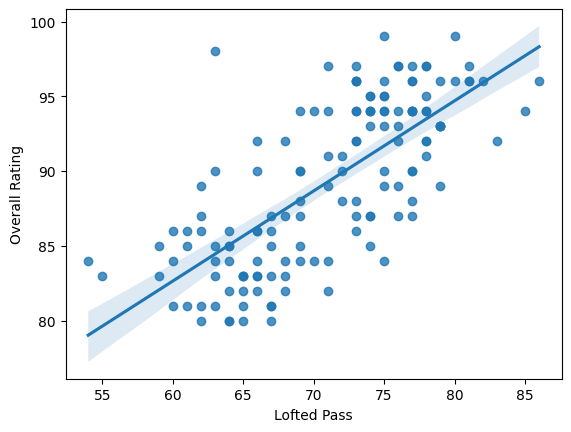

In [7]:
sns.regplot(data = df, x = 'Lofted Pass', y = 'Overall Rating')

<Axes: xlabel='Low Pass', ylabel='Overall Rating'>

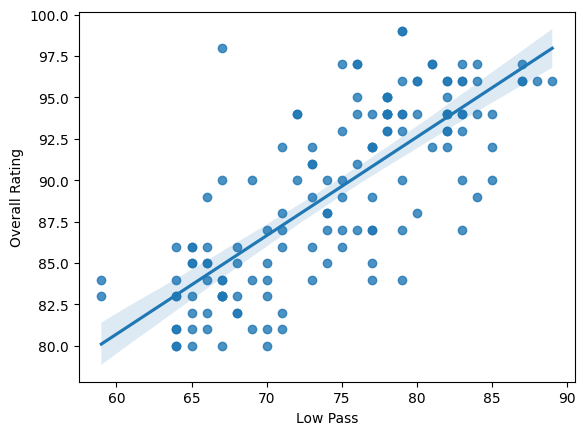

In [8]:
sns.regplot(data = df, x = 'Low Pass', y = 'Overall Rating')

 lofted pass, low pass, finishing  looks key stats for a SS.

##Scaling And Train Test Split

In [9]:
X = df.drop('Overall Rating', axis =1) # Removing the feature we need to predict
y =df['Overall Rating']

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=42)

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
scaler = MinMaxScaler()

In [14]:
X_train= scaler.fit_transform(X_train)

In [15]:
X_test = scaler.transform(X_test)

In [16]:
X_train.shape

(128, 27)

In [17]:
X_test.shape

(15, 27)

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [19]:
model = Sequential()

model.add(Dense(27,activation='relu'))
model.add(Dense(27,activation='relu'))
model.add(Dense(27,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [20]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=4,epochs=200)

Epoch 1/200
32/32 [==============================] - 2s 12ms/step - loss: 7699.8735 - val_loss: 7439.1279
Epoch 2/200
32/32 [==============================] - 0s 6ms/step - loss: 6792.0063 - val_loss: 5835.3091
Epoch 3/200
32/32 [==============================] - 0s 4ms/step - loss: 4137.6797 - val_loss: 1962.2986
Epoch 4/200
32/32 [==============================] - 0s 4ms/step - loss: 684.7003 - val_loss: 144.6580
Epoch 5/200
32/32 [==============================] - 0s 4ms/step - loss: 150.3628 - val_loss: 122.4568
Epoch 6/200
32/32 [==============================] - 0s 3ms/step - loss: 136.6099 - val_loss: 119.8448
Epoch 7/200
32/32 [==============================] - 0s 3ms/step - loss: 134.8749 - val_loss: 120.6715
Epoch 8/200
32/32 [==============================] - 0s 4ms/step - loss: 128.7647 - val_loss: 111.4432
Epoch 9/200
32/32 [==============================] - 0s 3ms/step - loss: 126.1969 - val_loss: 116.1647
Epoch 10/200
32/32 [==============================] - 0s 3ms/step 

In [21]:
model.save('SS_stats_predictor.h5')

## Now Repeat This process for all other data sets

In [22]:
#losses = pd.DataFrame(model.history.history)

In [23]:
#losses.plot()

In [24]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [25]:
#X_test

In [26]:
#predictions = model.predict(X_test)

In [27]:
#mean_absolute_error(y_test,predictions)

In [28]:
#model.summary()

In [29]:
#model.get_layer('dense_1').get_weights()

###Predicting On a New Player

In [30]:
#pl = df.drop('Overall Rating',axis=1).iloc[900]

In [31]:
#pl = scaler.transform(pl.values.reshape(-1,26))

In [32]:
#pl

In [33]:
#model.predict(pl)

In [34]:
#df.iloc[900]

In [35]:
#model.get_weights()

In [36]:
#df

In [37]:
new_row = [83,84,93,82,73,71,84,71,66,78,92,92,83,75,83,87,79,50,52,63,58,40,40,40,40,40,40]
newDF.append(pd.Series(new_row, index=newDF.columns[:len(new_row)]), ignore_index=True)

df.append([83,84,93,82,73,71,84,71,66,78,92,92,83,75,83,87,79,50,52,63,58,40,40,40,40,40,40])

NameError: ignored

In [ ]:
model.save('cf_stats_predictor.h5')